# Proyek Analisis Data

# Menyiapkan Pertanyaan Bisnis

1. Bagaimana tren jumlah sewa berdasarkan jam, hari, bulan? 
2. Bagaimana distribusi jumlah sewa setiap jam dan setiap hari berdasarkan season dan kondisi cuaca?
3. Kapan performa jumlah sewa terbanyak setiap bulan pada tahun 2011 dan tahun 2012 berdasarkan kondisi musim dan kondisi cuaca?
4. Bagaimana tren jumlah sewa ketika holiday atau working day? 
5. Bagaimana korelasi temperatur dengan kenaikan jumlah sewa?

# Import packages or library

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import datetime as dt

C:\Users\ASUS\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


# Data Wrangling

## Gathering Data

In [2]:
day_df = pd.read_csv("day.csv")
day_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [3]:
day_df = day_df.rename(columns={
    "instant" : 'rec_id',
    'dteday' : 'date_time',
    'yr' : 'year',
    'mnth' : 'month',
    'weathersit' : 'weather_condition',
    'hum' : 'humidity',
    'cnt' : 'total_count'
})

In [4]:
hour_df = pd.read_csv("hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [5]:
hour_df=hour_df.rename(columns={
    "instant" : 'rec_id',
    'dteday' : 'date_time',
    'yr' : 'year',
    'mnth' : 'month',
    'hr' : 'hour',
    'weathersit' : 'weather_condition',
    'hum' : 'humidity',
    'cnt' : 'total_count'
})

## Assesing Data

In [6]:
# day_df 
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rec_id             731 non-null    int64  
 1   date_time          731 non-null    object 
 2   season             731 non-null    int64  
 3   year               731 non-null    int64  
 4   month              731 non-null    int64  
 5   holiday            731 non-null    int64  
 6   weekday            731 non-null    int64  
 7   workingday         731 non-null    int64  
 8   weather_condition  731 non-null    int64  
 9   temp               731 non-null    float64
 10  atemp              731 non-null    float64
 11  humidity           731 non-null    float64
 12  windspeed          731 non-null    float64
 13  casual             731 non-null    int64  
 14  registered         731 non-null    int64  
 15  total_count        731 non-null    int64  
dtypes: float64(4), int64(11), 

In [7]:
#missing value 
day_df.isnull().sum()

rec_id               0
date_time            0
season               0
year                 0
month                0
holiday              0
weekday              0
workingday           0
weather_condition    0
temp                 0
atemp                0
humidity             0
windspeed            0
casual               0
registered           0
total_count          0
dtype: int64

In [8]:
#duplicate value 
day_df.duplicated().sum()

0

In [9]:
#hour_df 
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rec_id             17379 non-null  int64  
 1   date_time          17379 non-null  object 
 2   season             17379 non-null  int64  
 3   year               17379 non-null  int64  
 4   month              17379 non-null  int64  
 5   hour               17379 non-null  int64  
 6   holiday            17379 non-null  int64  
 7   weekday            17379 non-null  int64  
 8   workingday         17379 non-null  int64  
 9   weather_condition  17379 non-null  int64  
 10  temp               17379 non-null  float64
 11  atemp              17379 non-null  float64
 12  humidity           17379 non-null  float64
 13  windspeed          17379 non-null  float64
 14  casual             17379 non-null  int64  
 15  registered         17379 non-null  int64  
 16  total_count        173

In [10]:
#missing value
hour_df.isnull().sum()

rec_id               0
date_time            0
season               0
year                 0
month                0
hour                 0
holiday              0
weekday              0
workingday           0
weather_condition    0
temp                 0
atemp                0
humidity             0
windspeed            0
casual               0
registered           0
total_count          0
dtype: int64

In [11]:
#duplicate value
hour_df.duplicated().sum()

0

## Cleaning Data

### Cleaning Data Day

In [12]:
#mengubah type date time
day_df['date_time'] = pd.to_datetime(day_df['date_time'])
#mengubah type menjadi category type
day_df_cols = ['season', 'year', 'month', 'holiday', 'weekday', 'workingday', 'weather_condition']
for col in day_df_cols :
    day_df[col] = day_df[col].astype('category')
#membuat semua total count hasil penjumlahan casual dan registered user
day_df["total_count"] = day_df["casual"] + day_df["registered"]
#menghapus column rec_id yang tidak diperlukan
day_df=day_df.drop(columns='rec_id',axis=1)
#mengkonversi nilai column season : 1:Springer, 2:Summer, 3:Fall, 4:Winter
day_df.season.replace((1,2,3,4), ('Springer', 'Summer', 'Fall', 'Winter'), inplace=True)
#mengkonversi nilai column tahun, 0:2011, 1:2012
day_df.year.replace((0,1), (2011,2012), inplace=True)
#mengkonversi nilai column bulan, 1:Jan, 2:Feb, 3:Mar, 4:Apr, 5:May, 6:Jun, 7:Jul, 8:Aug, 9:Sep, 10:Oct, 11:Nov, 12:Dec
day_df.month.replace(
    (1,2,3,4,5,6,7,8,9,10,11,12), 
    ('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'), 
    inplace=True)
#mengkonversi nilai column holiday, 1:Holiday, 0:Not Holiday
day_df.holiday.replace((1,0), ('Holiday', 'Not Holiday'), inplace=True)
#mengkonversi nilai column weekday, 0:Sun, 1:Mon, 2:Tue, 3:Wed, 4:Thu, 5:Fri, 6:Sat
day_df.weekday.replace(
    (1,2,3,4,5,6,0), 
    ('Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'), 
    inplace=True)
#mengkonversi nilai column working day, 1:Working Day, 0:Not Working Day
day_df.workingday.replace((1,0), ('Working Day', 'Not Working Day'), inplace=True)
#mengkonversi nilai column weather_condition
day_df.weather_condition.replace(
    (1,2,3,4), 
    ('Clear, Few clouds, Partly cloudy, Partly cloudy', 
     'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist', 
    'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
    'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'),inplace=True )
day_df.head()

,date_time,season,year,month,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
0,2011-01-01,Springer,2011,Jan,Not Holiday,Sat,Not Working Day,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,Springer,2011,Jan,Not Holiday,Sun,Not Working Day,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,Springer,2011,Jan,Not Holiday,Mon,Working Day,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,Springer,2011,Jan,Not Holiday,Tues,Working Day,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,Springer,2011,Jan,Not Holiday,Wed,Working Day,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Cleaning Data Hour

In [13]:
#mengubah type date time
hour_df['date_time'] = pd.to_datetime(hour_df['date_time'])
#mengubah type menjadi category type
hour_df_cols = ['season', 'year','hour', 'month', 'holiday', 'weekday', 'workingday', 'weather_condition']
for col in hour_df_cols :
    hour_df[col] = hour_df[col].astype('category')
#membuat semua total count hasil penjumlahan casual dan registered user
hour_df["total_count"] = hour_df["casual"] + hour_df["registered"]
#menghapus column rec_id yang tidak diperlukan
hour_df=hour_df.drop(columns='rec_id',axis=1)
#mengkonversi nilai column season : 1:Springer, 2:Summer, 3:Fall, 4:Winter
hour_df.season.replace((1,2,3,4), ('Springer', 'Summer', 'Fall', 'Winter'), inplace=True)
#mengkonversi nilai column tahun, 0:2011, 1:2012
hour_df.year.replace((0,1), (2011,2012), inplace=True)
#mengkonversi nilai column bulan, 1:Jan, 2:Feb, 3:Mar, 4:Apr, 5:May, 6:Jun, 7:Jul, 8:Aug, 9:Sep, 10:Oct, 11:Nov, 12:Dec
hour_df.month.replace(
    (1,2,3,4,5,6,7,8,9,10,11,12), 
    ('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'), 
    inplace=True)
#mengkonversi nilai column holiday, 1:Holiday, 0:Not Holiday
hour_df.holiday.replace((1,0), ('Holiday', 'Not Holiday'), inplace=True)
#mengkonversi nilai column weekday, 0:Sun, 1:Mon, 2:Tue, 3:Wed, 4:Thu, 5:Fri, 6:Sat
hour_df.weekday.replace(
    (1,2,3,4,5,6,0), 
    ('Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'), 
    inplace=True)
#mengkonversi nilai column working day, 1:Working Day, 0:Not Working Day
hour_df.workingday.replace((1,0), ('Working Day', 'Not Working Day'), inplace=True)
#mengkonversi nilai column weather_condition
hour_df.weather_condition.replace(
    (1,2,3,4), 
    ('Clear, Few clouds, Partly cloudy, Partly cloudy', 
     'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist', 
    'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
    'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'),inplace=True )
hour_df.head()

,date_time,season,year,month,hour,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
0,2011-01-01,Springer,2011,Jan,0,Not Holiday,Sat,Not Working Day,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,Springer,2011,Jan,1,Not Holiday,Sat,Not Working Day,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,Springer,2011,Jan,2,Not Holiday,Sat,Not Working Day,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,Springer,2011,Jan,3,Not Holiday,Sat,Not Working Day,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,Springer,2011,Jan,4,Not Holiday,Sat,Not Working Day,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.24,0.2879,0.75,0.0,0,1,1


# Exploratory Data Analysis  (EDA)

## Explore 

In [14]:
day_df.describe()

,date_time,temp,atemp,humidity,windspeed,casual,registered,total_count
count,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2012-01-01 00:00:00,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,2011-01-01 00:00:00,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,2011-07-02 12:00:00,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,2012-01-01 00:00:00,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,2012-07-01 12:00:00,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,2012-12-31 00:00:00,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,NaN,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [15]:
day_df.corr(numeric_only=True)

,temp,atemp,humidity,windspeed,casual,registered,total_count
temp,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494
atemp,0.991702,1.000000,0.139988,-0.183643,0.543864,0.544192,0.631066
humidity,0.126963,0.139988,1.000000,-0.248489,-0.077008,-0.091089,-0.100659
windspeed,-0.157944,-0.183643,-0.248489,1.000000,-0.167613,-0.217449,-0.234545
casual,0.543285,0.543864,-0.077008,-0.167613,1.000000,0.395282,0.672804
registered,0.540012,0.544192,-0.091089,-0.217449,0.395282,1.000000,0.945517
total_count,0.627494,0.631066,-0.100659,-0.234545,0.672804,0.945517,1.000000


In [16]:
day_df.cov(numeric_only=True)

,temp,atemp,humidity,windspeed,casual,registered,total_count
temp,0.033508,0.029583,0.003310,-0.002241,68.283781,1.542309e+02,2.225147e+02
atemp,0.029583,0.026556,0.003249,-0.002319,60.854436,1.383669e+02,1.992213e+02
humidity,0.003310,0.003249,0.020286,-0.002743,-7.530987,-2.024225e+01,-2.777323e+01
windspeed,-0.002241,-0.002319,-0.002743,0.006006,-8.919005,-2.629318e+01,-3.521218e+01
casual,68.283781,60.854436,-7.530987,-8.919005,471450.441418,4.234689e+05,8.949193e+05
registered,154.230919,138.366859,-20.242247,-26.293180,423468.902417,2.434400e+06,2.857869e+06
total_count,222.514700,199.221295,-27.773235,-35.212185,894919.343836,2.857869e+06,3.752788e+06


In [17]:
hour_df.describe()

,date_time,temp,atemp,humidity,windspeed,casual,registered,total_count
count,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2012-01-02 04:08:34.552045568,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,2011-01-01 00:00:00,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-04 00:00:00,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,2012-01-02 00:00:00,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,2012-07-02 00:00:00,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,2012-12-31 00:00:00,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,NaN,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [18]:
hour_df.corr(numeric_only=True)

,temp,atemp,humidity,windspeed,casual,registered,total_count
temp,1.000000,0.987672,-0.069881,-0.023125,0.459616,0.335361,0.404772
atemp,0.987672,1.000000,-0.051918,-0.062336,0.454080,0.332559,0.400929
humidity,-0.069881,-0.051918,1.000000,-0.290105,-0.347028,-0.273933,-0.322911
windspeed,-0.023125,-0.062336,-0.290105,1.000000,0.090287,0.082321,0.093234
casual,0.459616,0.454080,-0.347028,0.090287,1.000000,0.506618,0.694564
registered,0.335361,0.332559,-0.273933,0.082321,0.506618,1.000000,0.972151
total_count,0.404772,0.400929,-0.322911,0.093234,0.694564,0.972151,1.000000


In [19]:
hour_df.cov(numeric_only=True)

,temp,atemp,humidity,windspeed,casual,registered,total_count
temp,0.037078,0.032683,-0.002596,-0.000545,4.363584,9.774015,14.137600
atemp,0.032683,0.029532,-0.001721,-0.001311,3.847457,8.650110,12.497567
humidity,-0.002596,-0.001721,0.037222,-0.006847,-3.301074,-7.999213,-11.300287
windspeed,-0.000545,-0.001311,-0.006847,0.014967,0.544609,1.524342,2.068951
casual,4.363584,3.847457,-3.301074,0.544609,2430.986021,3780.723542,6211.709563
registered,9.774015,8.650110,-7.999213,1.524342,3780.723542,22909.027999,26689.751541
total_count,14.137600,12.497567,-11.300287,2.068951,6211.709563,26689.751541,32901.461104


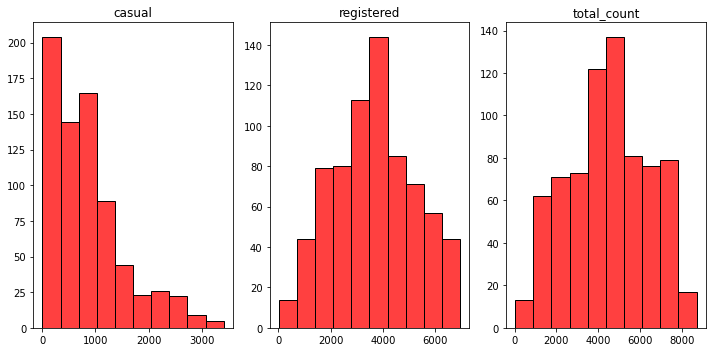

In [20]:
#distribusi user

columns = ['casual', 'registered', 'total_count']

fig, ax = plt.subplots(1, 3, figsize=(10,5))

for i, ax in enumerate(ax):
    sns.histplot(x=day_df[columns[i]], ax=ax, bins=10, color='red')
    ax.set_title(columns[i])
    ax.set_xlabel("")
    ax.set_ylabel("")

plt.tight_layout()
plt.show()

In [21]:
#pengaruh season terhadap jumlah order
season_impact_df=day_df.groupby(by='season')["total_count"].mean().reset_index()
season_impact_df

,season,total_count
0,Springer,2604.132597
1,Summer,4992.331522
2,Fall,5644.303191
3,Winter,4728.162921


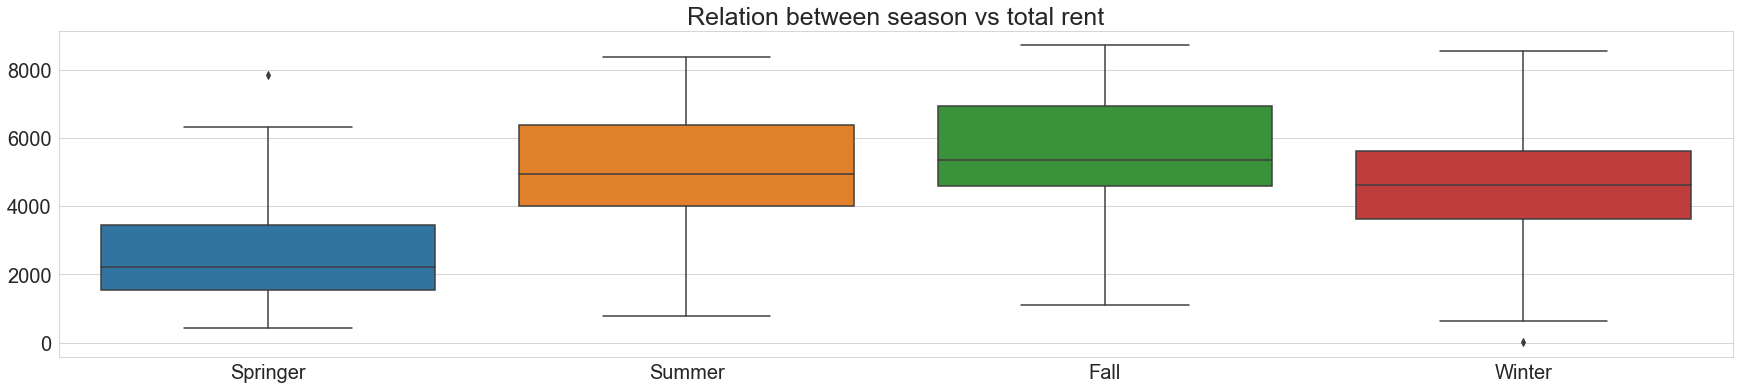

In [56]:
fig, ax = plt.subplots(figsize=(30,6))
sns.boxplot(x='season', y='total_count', data=day_df, ax=ax)
ax.set_xlabel(None)
ax.set_ylabel(None)
ax.set_title("Relation between season vs total rent", loc='center', fontsize=25)
ax.tick_params(axis='y', labelsize=20)
ax.tick_params(axis='x', labelsize=20)
plt.show()

Boxplot di atas menunjukkan rata rata total sewa harian setiap musimnya. Total jumlah sewa terbanyak terjadi pada saat musim gugur (fall season) dengan rata-rata jumlah sewa harian sekitar 5644 kali, sedangkan total jumlah sewa paling sedikit terjadi pada saat musim semi (springer season) dengan rata rata jumlah sewa harian sekitar 2604 kali. 

In [23]:
#pengaruh kondisi cuaca terhadap jumlah order
weather_impact =hour_df.groupby(by='weather_condition').total_count.mean().reset_index()
weather_impact

,weather_condition,total_count
0,"Clear, Few clouds, Partly cloudy, Partly cloudy",204.869272
1,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",175.165493
2,"Light Snow, Light Rain + Thunderstorm + Scatte...",111.579281
3,Heavy Rain + Ice Pallets + Thunderstorm + Mist...,74.333333


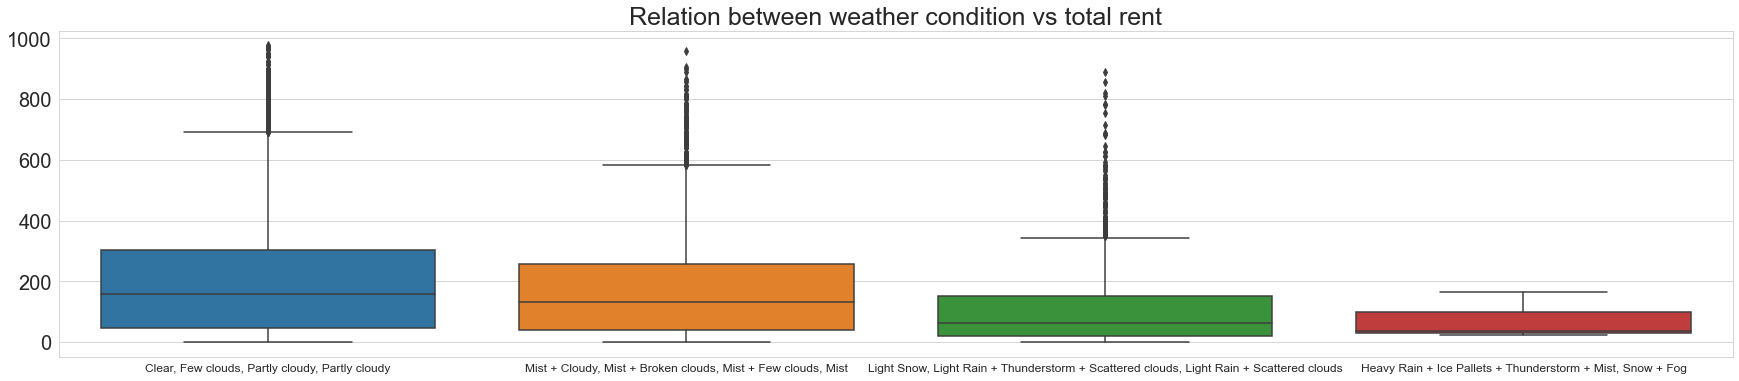

In [57]:
fig, ax = plt.subplots(figsize=(30,6))
sns.boxplot(x='weather_condition', y='total_count', data=hour_df, ax=ax)
ax.set_xlabel(None)
ax.set_ylabel(None)
ax.set_title("Relation between weather condition vs total rent", loc='center', fontsize=25)
ax.tick_params(axis='y', labelsize=20)
ax.tick_params(axis='x', labelsize=12)
plt.show()

Boxplot di atas menunjukkan rata rata total sewa perjam berdasarkan kondisi cuaca (weather condition). Total jumlah sewa terbanyak terjadi pada saat cuaca bersih/sedikit berawan dengan rata-rata jumlah sewa perjam sekitar 204 kali, sedangkan total jumlah sewa paling sedikit terjadi pada saat cuaca hujan lebat/salju lebat/badai petir dengan rata rata jumlah sewa perjam sekitar 74 kali. Dari boxplot diatas dapat dilihat bahwa ketika cuaca semakin buruk, permintaan akan jumlah sewa juga mengalami penurunan. 

Kedua boxplot di atas telah menunjukkan garis besar bagaimana pengaruh musim dan kondisi cuaca terhadap jumlah sewa. Pada proses explanatory analysis di bawah akan ditunjukkan bagaimana tren jumlah sewa perjam, perhari, dan perbulan berdasarkan musim dan kondisi cuaca. Selain itu, akan dilakukan analisis jumlah sewa terbanyak antara hari libur atau hari kerja. 

## Visualization & Explanatory Analysis

**1. Bagaimana trend jumlah sewa berdasarkan jam, hari, dan bulan?**

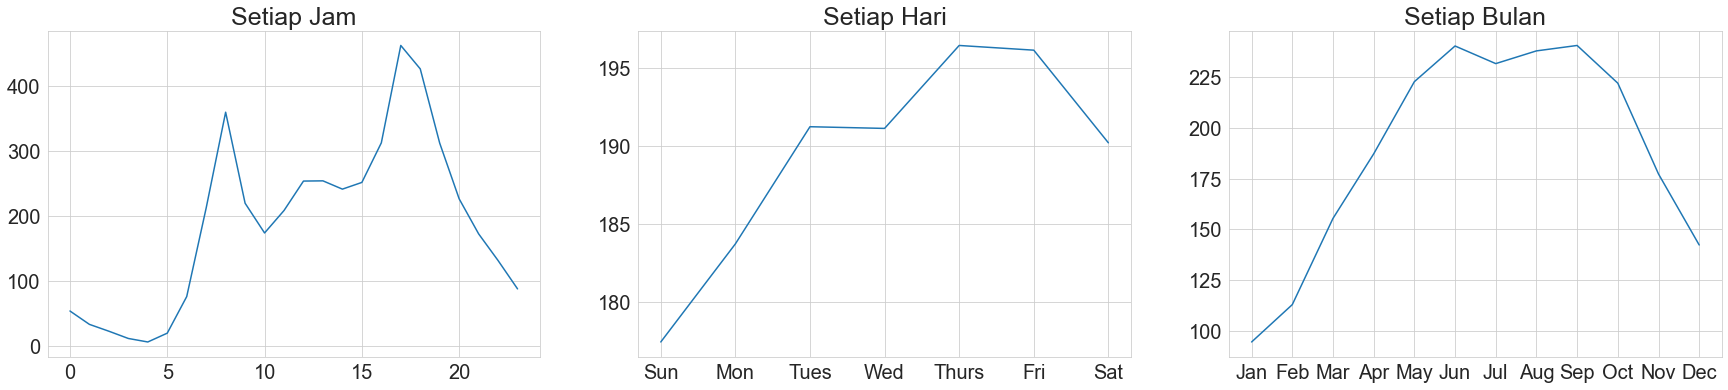

In [25]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30,6))

sns.lineplot(x='hour', y='total_count', data=hour_df, ci=None, ax=ax[0])
ax[0].set_xlabel(None)
ax[0].set_ylabel(None)
ax[0].set_title('Setiap Jam', loc='center', fontsize=25)
ax[0].tick_params(axis ='y', labelsize=20)
ax[0].tick_params(axis ='x', labelsize=20)

sns.lineplot(x='weekday', y='total_count', data=hour_df, ci=None, ax=ax[1])
ax[1].set_xlabel(None)
ax[1].set_ylabel(None)
ax[1].set_title('Setiap Hari', loc='center', fontsize=25)
ax[1].tick_params(axis ='y', labelsize=20)
ax[1].tick_params(axis ='x', labelsize=20)

sns.lineplot(x='month', y='total_count',data=hour_df, ci=None, ax=ax[2])
ax[2].set_xlabel(None, labelpad=10)
ax[2].set_ylabel(None)
ax[2].set_title('Setiap Bulan', loc='center', fontsize=25)
ax[2].tick_params(axis ='y', labelsize=20)
ax[2].tick_params(axis ='x', labelsize=20)

plt.show()

Grafik di atas menunjukkan tren jumlah sewa berdasarkan setiap jam, setiap hari, dan setiap bulannya. Dilihat dari grafik setiap jam, jumlah sewa terbanyak terjadi di setiap rentang pukul 17:00 - 18:00 dengan jumlah sewa sebanyak 450 kali. Dari gafik dapat dilihat jam kerja puncak berada di rentang pukul 5:00 - 8:00 dan pukul 15:00 - 17:00 artinya pada rentang pukul ini permintaan akan sewa sepeda terus meningkat. Hal ini menjadi penting bagi bisnis dan peluang potensial untuk peningkatan layanan agar dapat dimanfaatkan dengan baik. 

Dari grafik setiap hari, permintaan jumlah sewa mengalami peningkatan yang signifikan setiap hari kerja. Sedangkan ketika akhir pekan, permintaan jumlah sewa mengalami penurunan. Hal ini dapat menjadi strategi untuk bisnis dalam menargetkan segmen pelanggan yang berbeda pada hari kerja. 

Dari grafik setiap bulan, permintaan jumlah sewa tertinggi berada di rentang bulan Juni - September dengan jumlah sewa sekitar 225-250 kali. Pada rentang bulan ini, menjadi perhatian penting bagi bisnis untuk dapat meningkatkan layanan dan menargetkan segmen pelanggan yang berbeda. Selain itu, pada bulan Januari - Juni dan September - Desember harus menjadi perhatian penting juga karena terjadinya peningkatan dan penurunan jumlah sewa. Hal ini kemungkinan disebabkan karena pengaruh musim dan juga temperatur. Oleh karena itu, perusahaan harus menyiapkan strategi yang inovatif agar layanan bisnis tetap maksimal. 

**2. Bagaimana distribusi jumlah sewa setiap jam dan setiap hari berdasarkan season dan kondisi cuaca?**

In [26]:
#jumlah sewa setiap jamnya berdasarkan kondisi cuaca
weather_impact_hour=hour_df.groupby(['weather_condition', 'hour',]).agg({
    'total_count' : 'mean'
}).reset_index()

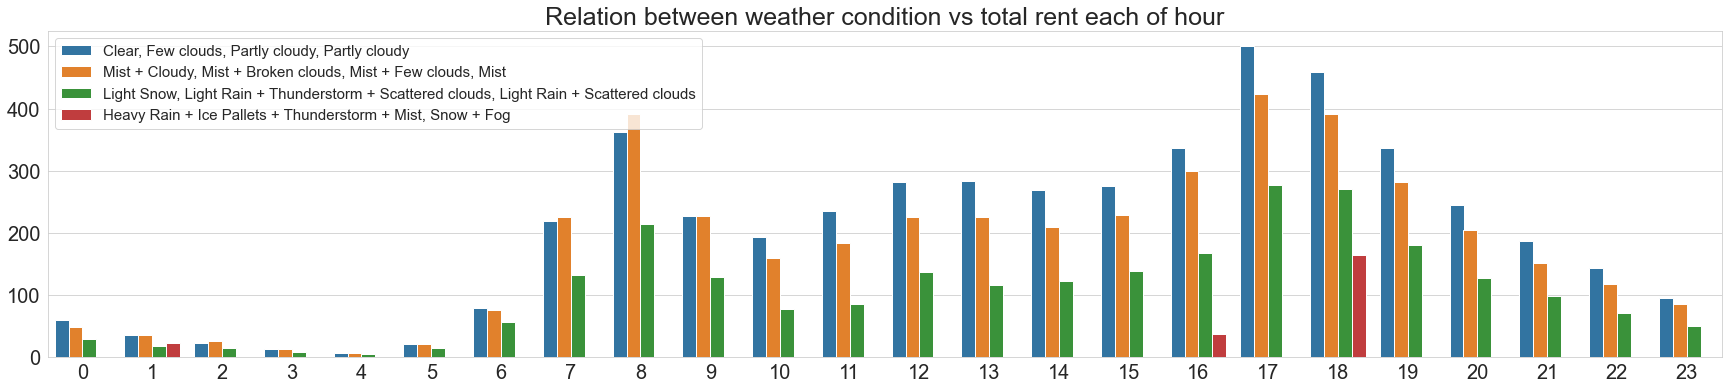

In [27]:
fig, ax = plt.subplots(figsize=(30,6))

sns.barplot(data=weather_impact_hour, x='hour', y='total_count', hue='weather_condition', ax=ax)
ax.set_xlabel(None)
ax.set_ylabel(None)
ax.set_title('Relation between weather condition vs total rent each of hour', loc='center', fontsize=25)
ax.legend(fontsize=15)
ax.tick_params(axis ='y', labelsize=20)
ax.tick_params(axis ='x', labelsize=20)

plt.show()

In [28]:
#jumlah sewa setiap jamnya berdasarkan musim
season_impact_hour=hour_df.groupby(['season', 'hour']).agg({
    'total_count' : 'mean'
}).reset_index()

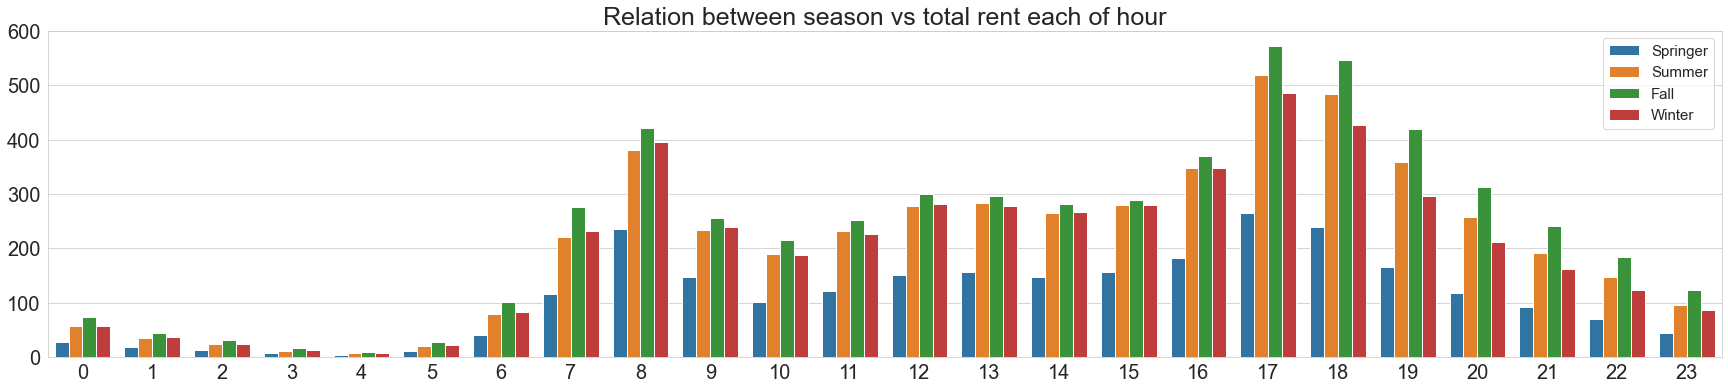

In [29]:
fig, ax = plt.subplots(figsize=(30,6))

sns.barplot(data=season_impact_hour, x='hour', y='total_count', hue='season', ax=ax)
ax.set_xlabel(None)
ax.set_ylabel(None)
ax.set_title('Relation between season vs total rent each of hour', loc='center', fontsize=25)
ax.legend(fontsize=15)
ax.tick_params(axis ='y', labelsize=20)
ax.tick_params(axis ='x', labelsize=20)

plt.show()

Kedua histogram di atas menunjukkan pengaruh kondisi cuaca dan musim terhadap jumlah sewa setiap jamnya. Dapat dilihat pada kondisi cuaca dan kondisi musim tertentu di setiap jamnya memiliki pola permintaan jumlah sewa yang sama.

- Dalam setiap jam rata-rata permintaan sewa terbanyak terjadi ketika cuaca bersih atau berawan dan ketika cuaca mendung + kabut dalam rentang permintaan sebanyak 50-450 kali. 
- Sedangkan ketika cuaca salju atau hujan ringan permintaan sewa menurun secara signifikan dalam rentang 20-250 kali. 
- Bahkan ketika cuaca salju, hujan leban, dan badai petir permintaan sewa sangat sedikit dengan rentang jumlah sewa sebanyak 20-180 kali. 

Sedangkan jika dilihat berdasarkan kondisi musim, dalam setiap jamnya ketika musim gugur, panas, dan dingin permintaan jumlah sewa tidak memiliki perbedaan yang signifikan dengan jumlah sewa dalam rentang 50-500 kali. Berbeda halnya ketika musim semi permintaan jumlah sewa lebih sedikit. Hal ini menjadi perhatian penting bagi bisnis untuk menyiapkan strategi operasional agar dapat menyesuaikan dengan kondisi cuaca dan musim yang terjadi. 

In [30]:
#jumlah sewa setiap harinya berdasarkan kondisi cuaca
weather_impact_daily=day_df.groupby(['weekday','weather_condition']).agg({
    'total_count' : 'mean'
}).reset_index()

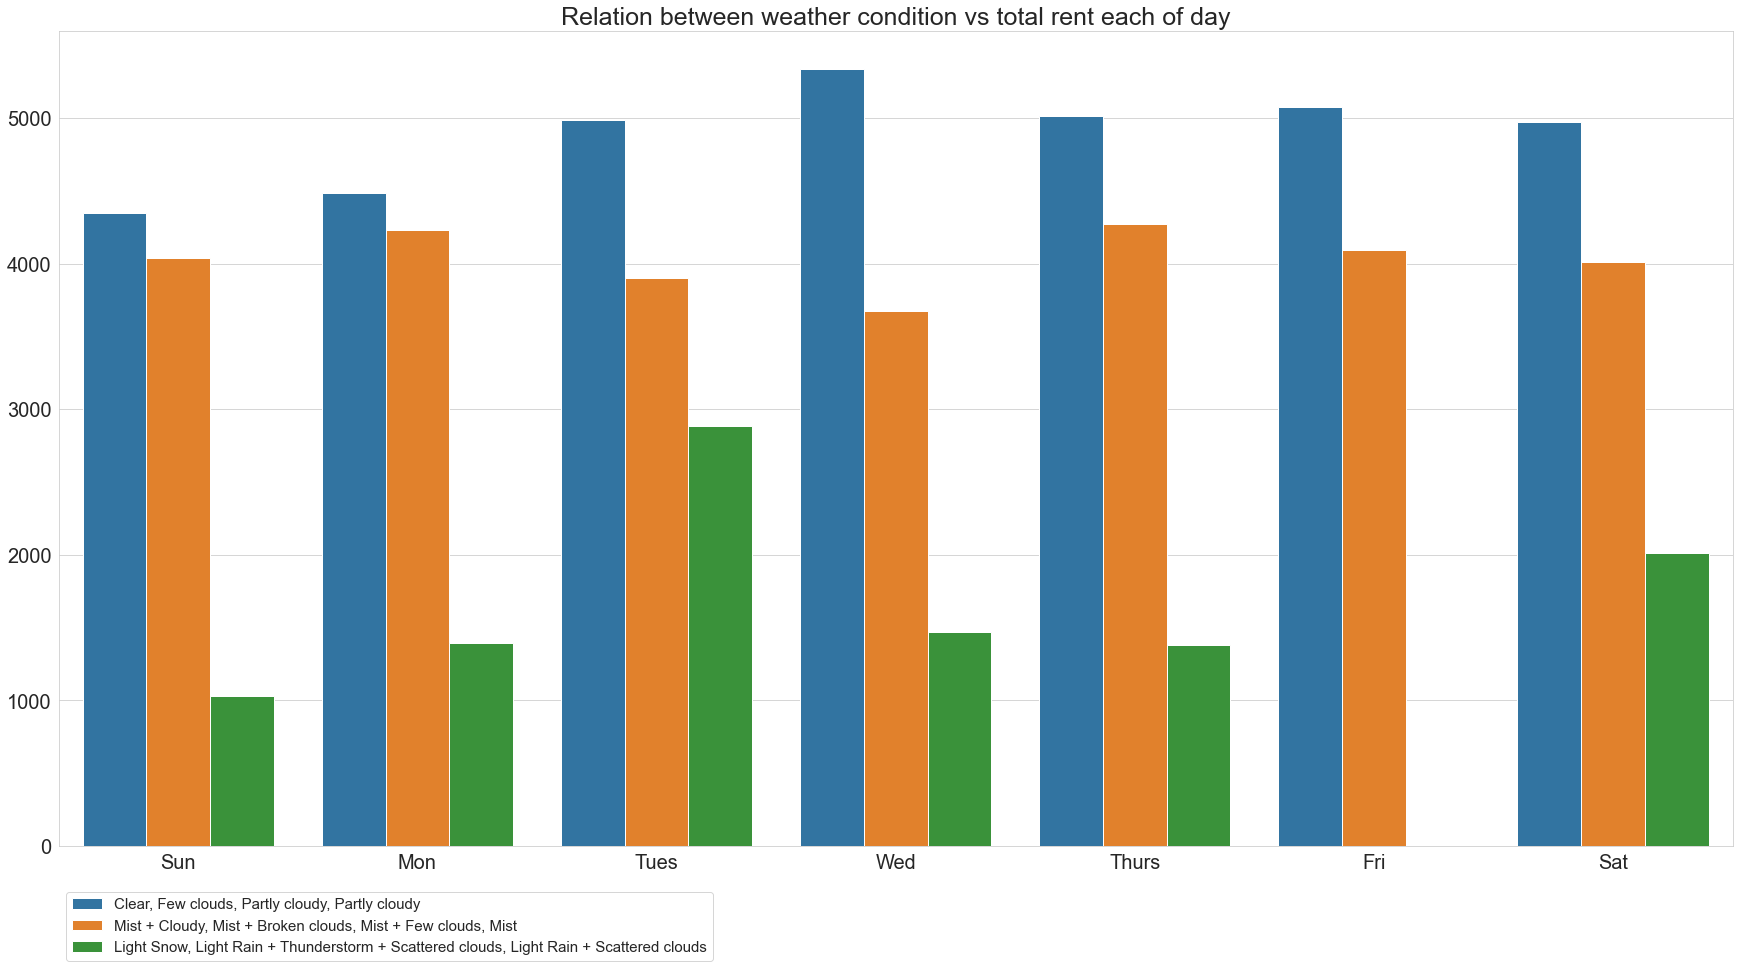

In [31]:
fig, ax = plt.subplots(figsize=(30,15))

sns.barplot(data=weather_impact_daily, x='weekday', y='total_count', hue='weather_condition', ax=ax)
ax.set_xlabel(None)
ax.set_ylabel(None)
ax.set_title('Relation between weather condition vs total rent each of day', loc='center', fontsize=25)
ax.legend(loc='lower left', bbox_to_anchor=(0, -0.15), fontsize=15)
ax.tick_params(axis ='y', labelsize=20)
ax.tick_params(axis ='x', labelsize=20)

plt.show()

Histogram di atas menunjukkan pengaruh kondisi cuaca terhadap jumlah sewa setiap harinya. Histogram ini memiliki pola yang berbeda dengan histogram sebelumnya. 

- Pada kondisi cuaca bersih atau berawan permintaan jumlah sewa tertinggi pada hari Rabu. 
- Pada kondisi cuaca mendung + kabut permintaan jumlah sewa terbanyak pada hari Selasa dan Kamis. 
- Pada kondisi cuaca salju atau hujan ringan permintaan jumlah sewa terbanyak pada hari Selasa. 

Dapat disimpulkan tren jumlah sewa setiap harinya berdasarkan kondisi cuaca berbeda-beda. Oleh karena itu, hal yang harus dilakukan oleh bisnis adalah menyiapkan strategi yang berbeda untuk tingkat layanan dalam setiap kondisi cuaca. 

In [32]:
#jumlah sewa setiap harinya berdasarkan musim
season_impact_daily=day_df.groupby(['weekday','season']).agg({
    'total_count' : 'mean'
}).reset_index()

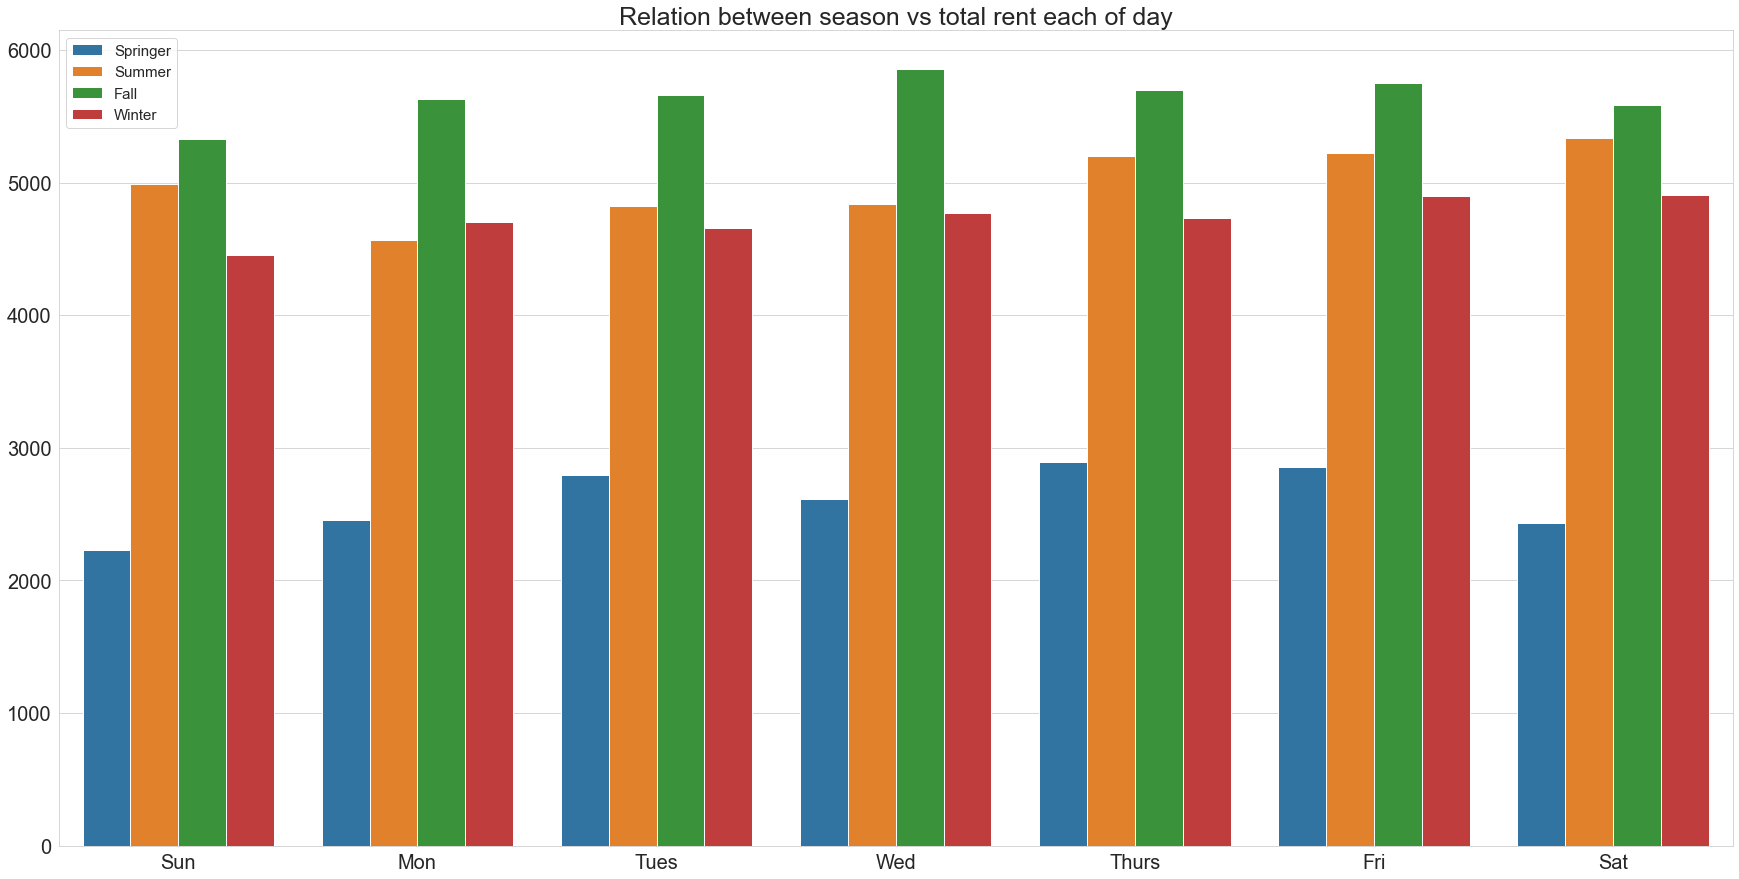

In [33]:
fig, ax = plt.subplots(figsize=(30,15))

sns.barplot(data=season_impact_daily, x='weekday', y='total_count', hue='season', ax=ax)
ax.set_xlabel(None)
ax.set_ylabel(None)
ax.set_title('Relation between season vs total rent each of day', loc='center', fontsize=25)
ax.legend(fontsize=15)
ax.tick_params(axis ='y', labelsize=20)
ax.tick_params(axis ='x', labelsize=20)

plt.show()

Histogram di atas menunjukkan pengaruh kondisi musim terhadap jumlah sewa setiap harinya. Histogram ini memiliki pola yang berbeda dengan histogram sebelumnya. 

- Pada kondisi musim gugur permintaan jumlah sewa tertinggi pada hari Rabu. 
- Pada kondisi musim panas permintaan jumlah sewa terbanyak pada hari Jumat dan Sabtu. 
- Pada kondisi musim dingin permintaan jumlah sewa terbanyak pada hari Jumat. 
- Pada kondisi musim semi permintaan jumlah sewa terbanyak pada hari Selasa - Jumat. 

Dapat disimpulkan tren jumlah sewa setiap harinya berdasarkan kondisi musim berbeda-beda. Oleh karena itu, hal yang harus dilakukan oleh bisnis adalah menyiapkan strategi yang berbeda untuk tingkat layanan dalam setiap kondisi musim. 

**3. Kapan performa jumlah sewa terbanyak setiap bulan pada tahun 2011 dan tahun 2012 berdasarkan kondisi musim dan kondisi cuaca?**

In [34]:
year_2011=day_df[day_df["year"]==2011]
performance_byseason_2011=year_2011.groupby(['month', 'season']).total_count.mean().reset_index()
performance_byweather_2011=year_2011.groupby(['month', 'weather_condition']).total_count.mean().reset_index()

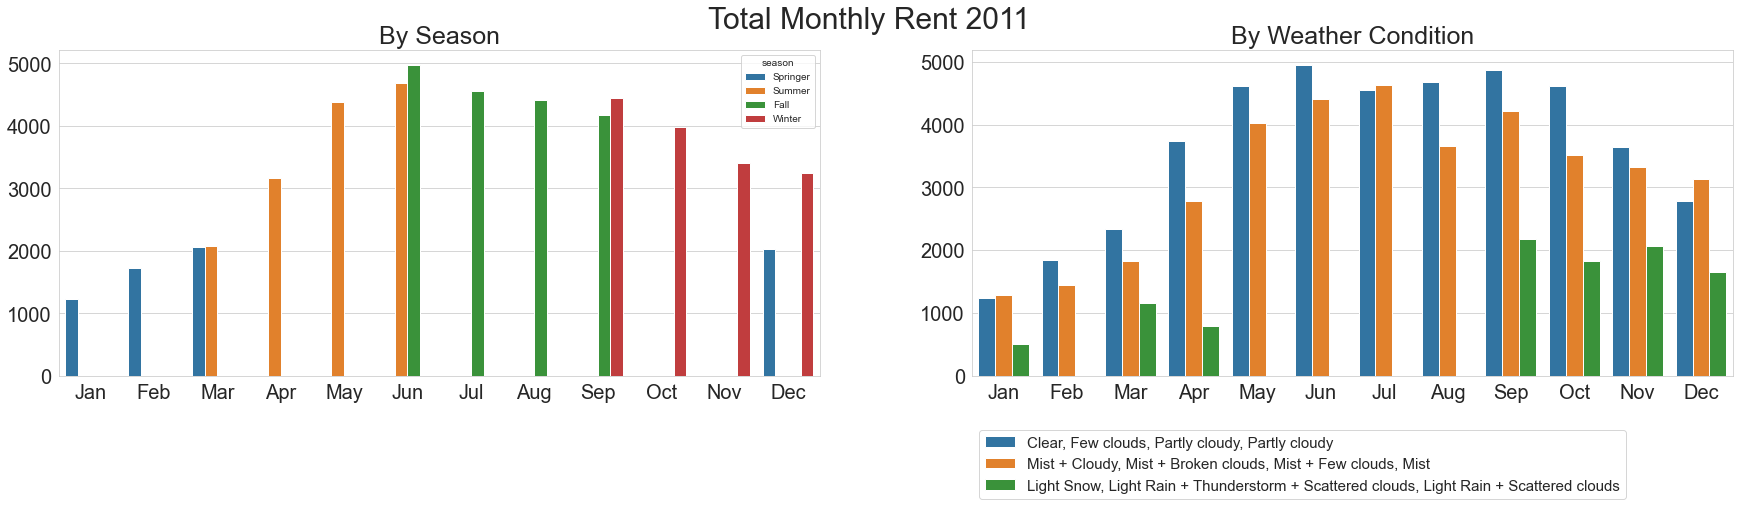

In [35]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(30, 6))

sns.barplot(x="month", y="total_count", data=performance_byseason_2011, hue='season', ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Season", loc="center", fontsize=25)
ax[0].tick_params(axis ='y', labelsize=20)
ax[0].tick_params(axis ='x', labelsize=20)


sns.barplot(x='month', y='total_count', data=performance_byweather_2011, hue='weather_condition', ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].legend(loc='lower left', bbox_to_anchor=(0, -0.4), fontsize=15)
ax[1].set_title("By Weather Condition", loc="center", fontsize=25)
ax[1].tick_params(axis ='y', labelsize=20)
ax[1].tick_params(axis ='x', labelsize=20)

plt.suptitle("Total Monthly Rent 2011", fontsize=30)
plt.show()

In [36]:
year_2012=day_df[day_df["year"]==2012]
performance_byseason_2012=year_2012.groupby(['month', 'season']).total_count.mean().reset_index()
performance_byweather_2012=year_2012.groupby(['month', 'weather_condition']).total_count.mean().reset_index()

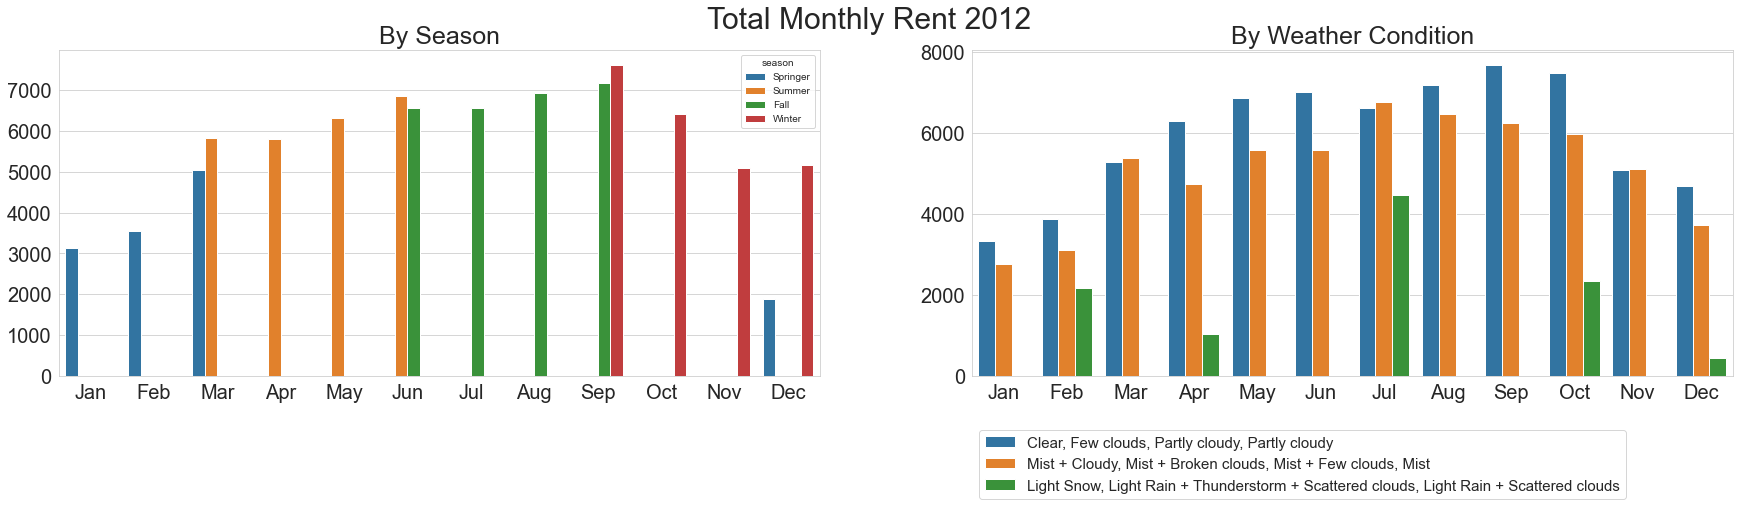

In [37]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(30, 6))

sns.barplot(x="month", y="total_count", data=performance_byseason_2012, hue='season', ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Season", loc="center", fontsize=25)
ax[0].tick_params(axis ='y', labelsize=20)
ax[0].tick_params(axis ='x', labelsize=20)

sns.barplot(x='month', y='total_count', data=performance_byweather_2012, hue='weather_condition', ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].legend(loc='lower left', bbox_to_anchor=(0, -0.4), fontsize=15)
ax[1].set_title("By Weather Condition", loc="center", fontsize=25)
ax[1].tick_params(axis ='y', labelsize=20)
ax[1].tick_params(axis ='x', labelsize=20)

plt.suptitle("Total Monthly Rent 2012", fontsize=30)
plt.show()

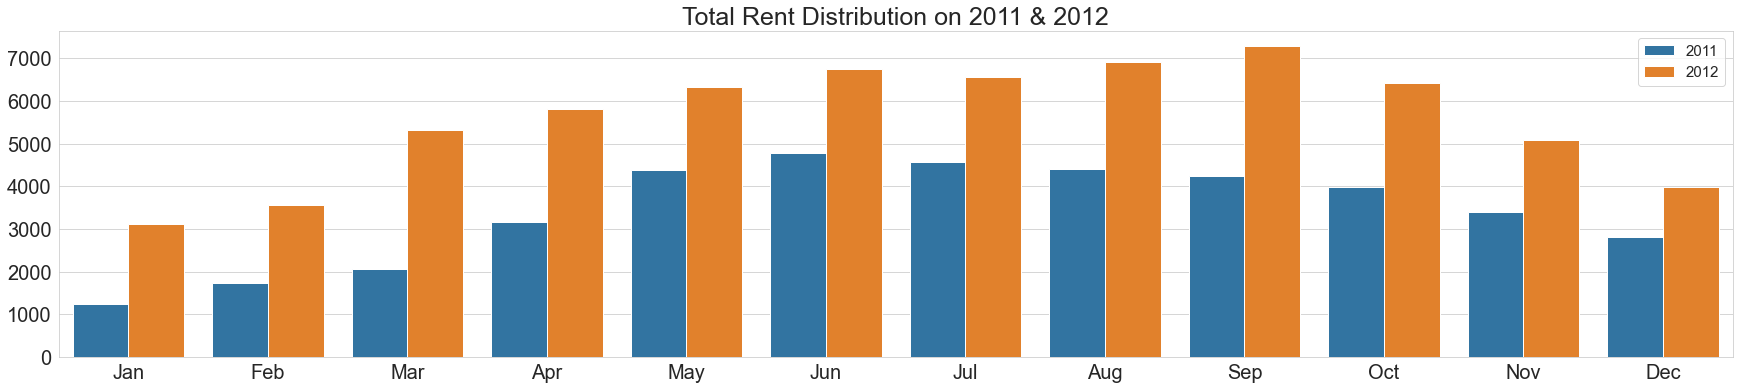

In [38]:
#distribusi jumlah sewa bulanan pada tahun 2011 dan tahun 2012

year_monthly_df=day_df.groupby(['year', 'month']).total_count.mean().reset_index()

fig, ax = plt.subplots(figsize=(30,6))
sns.barplot(data=year_monthly_df, x='month', y='total_count', hue='year', ax=ax)
ax.set_xlabel(None)
ax.set_ylabel(None)
ax.set_title("Total Rent Distribution on 2011 & 2012", loc="center", fontsize=25)
ax.tick_params(axis ='y', labelsize=20)
ax.tick_params(axis ='x', labelsize=20)
ax.legend(fontsize=15)
plt.show()

Ketiga histogram di atas menunjukkan performa jumlah sewa setiap bulannya pada tahun 2011 dan tahun 2012. Pada histogram 'Total Rent Distribution on 2011 & 2012' dapat disimpulkan bahwa total jumlah sewa terbanyak terjadi pada tahun 2012. Selain itu untuk tahun 2012 total jumlah sewa terbanyak terjadi pada bulan September sedangkan pada tahun 2011 total jumlah sewa terbanyak terjadi pada bulan Juni. 

Jika dilihat pada histogram Total Monthly Rent by Season, pola musim dan tren jumlah sewa setiap bulannya sama. Sedangkan jika dilihat pada histogram Total Monthly Rent by Weather Condition, pola kondisi cuaca setiap bulannya berbeda sehingga tren jumlah sewa juga berbeda. 

Perbandingan jumlah sewa pada tahun 2011 dan tahun 2012 berdasarkan kondisi cuaca dan musim dapat menjadi referensi bagi bisnis untuk terus meningkatkan performa permintaan jumlah sewa. Selain itu, pelaku bisnis dapat mempelajari pola terjadinya kondisi cuaca dan musim pada tahun-tahun ke depan sehingga dapat meningkatkan potensial dan segmentasi pelanggan untuk layanan yang lebih baik ke depannya. 

**4. Bagaimana tren jumlah sewa ketika holiday atau working day?**

In [39]:
#perbedaan working day atau holiday terhadap total sewa
rent_workingday_df=day_df.groupby('holiday').total_count.mean().reset_index()
rent_workingday_df

,holiday,total_count
0,Not Holiday,4527.104225
1,Holiday,3735.000000


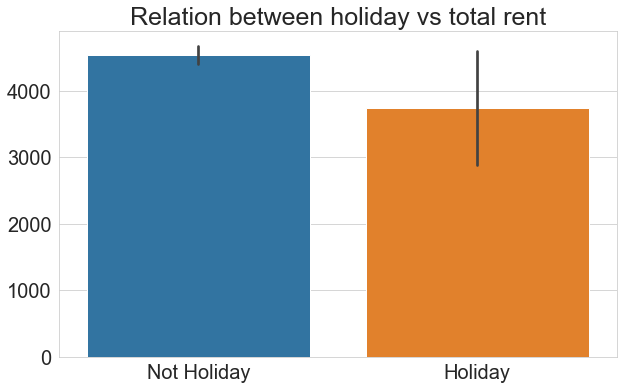

In [40]:
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(x='holiday', y='total_count', data=day_df, ax=ax)
ax.set_xlabel(None)
ax.set_ylabel(None)
ax.set_title("Relation between holiday vs total rent", loc='center', fontsize=25)
ax.tick_params(axis='y', labelsize=20)
ax.tick_params(axis='x', labelsize=20)
plt.show()

Dari histogram di atas, permintaan jumlah sewa terbanyak terjadi ketika hari kerja dibandingkan hari libur. Perbedaan ini menjadi potensi bagi bisnis untuk menerapkan segmentasi pelanggan pada hari kerja dan juga dapat meningkatkan branding layanan sewa sepeda. 

In [41]:
#perbedaan working day atau holiday terhadap total count berdasarkan kondisi cuaca
weather_workingday_df=day_df.groupby(['holiday', 'weather_condition']).total_count.mean().reset_index()
weather_workingday_df

,holiday,weather_condition,total_count
0,Not Holiday,"Clear, Few clouds, Partly cloudy, Partly cloudy",4905.154018
1,Not Holiday,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",4061.684647
2,Not Holiday,"Light Snow, Light Rain + Thunderstorm + Scatte...",1803.285714
3,Holiday,"Clear, Few clouds, Partly cloudy, Partly cloudy",4029.533333
4,Holiday,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",2998.666667
5,Holiday,"Light Snow, Light Rain + Thunderstorm + Scatte...",NaN


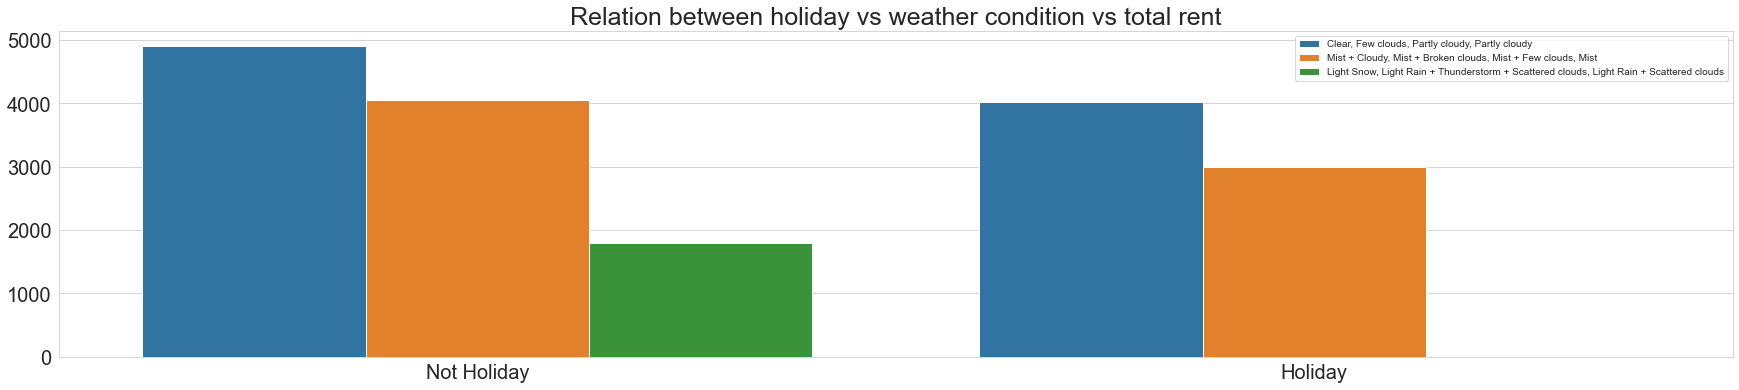

In [42]:
fig, ax = plt.subplots(figsize=(30,6))
sns.barplot(x='holiday', y='total_count', data=weather_workingday_df, hue='weather_condition', ax=ax)
ax.set_xlabel(None)
ax.set_ylabel(None)
ax.set_title("Relation between holiday vs weather condition vs total rent", loc='center', fontsize=25)
ax.legend(loc='upper right')
ax.tick_params(axis='y', labelsize=20)
ax.tick_params(axis='x', labelsize=20)
plt.show()

In [43]:
#perbedaan working day atau holiday terhadap total count berdasarkan season
season_workingday_df=day_df.groupby(['holiday', 'season']).total_count.mean().reset_index()
season_workingday_df

,holiday,season,total_count
0,Not Holiday,Springer,2640.994253
1,Not Holiday,Summer,4994.177778
2,Not Holiday,Fall,5642.923913
3,Not Holiday,Winter,4752.680233
4,Holiday,Springer,1687.857143
5,Holiday,Summer,4909.250000
6,Holiday,Fall,5707.750000
7,Holiday,Winter,4025.333333


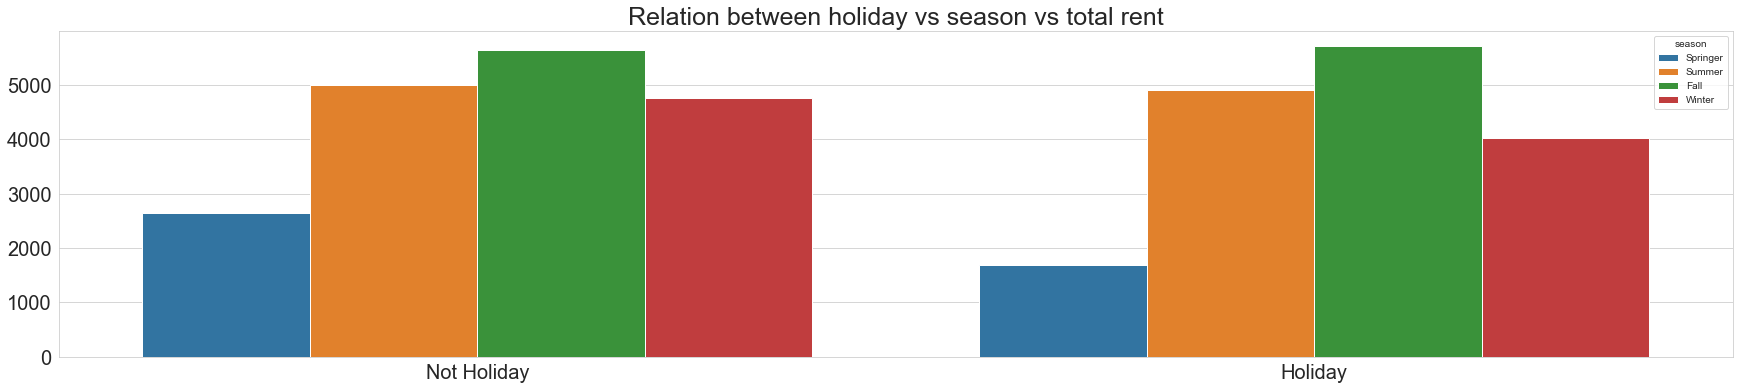

In [44]:
fig, ax = plt.subplots(figsize=(30,6))
sns.barplot(x='holiday', y='total_count', data=season_workingday_df, hue='season', ax=ax)
ax.set_xlabel(None)
ax.set_ylabel(None)
ax.set_title("Relation between holiday vs season vs total rent", loc='center', fontsize=25)
ax.tick_params(axis='y', labelsize=20)
ax.tick_params(axis='x', labelsize=20)
plt.show()

Jika dilihat secara kasat mata, pengaruh kondisi cuaca dan kondisi musim untuk hari kerja atau hari libur terhadap jumlah sewa memiliki pola yang sama dengan visualisasi data sebelumnya. Hal yang penting bagi pelaku bisnis untuk dapat menyiapkan strategi untuk meningkatkan permintaan jumlah sewa setiap musimnya agar memiliki rata-rata permintaan yang sama. 

**5. Bagaimana korelasi temperatur dengan kenaikan jumlah sewa?**

In [45]:
# Merubah nilai dari 'temp' ke dalam nilai yang belum dinormalisasi
hour_df['temp'] = hour_df['temp']*47
hour_df['temp'] = hour_df['temp']-8

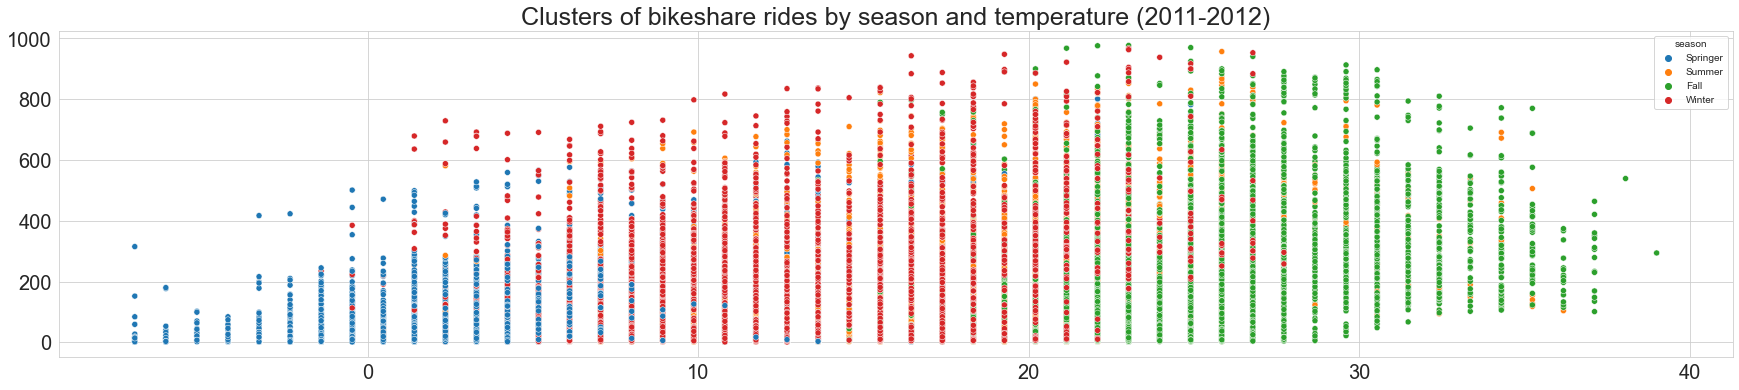

In [46]:
fig, ax = plt.subplots(figsize=(30,6))
sns.scatterplot(x='temp', y='total_count', data=hour_df, hue='season', ax=ax)
ax.set_xlabel(None)
ax.set_ylabel(None)
ax.set_title("Clusters of bikeshare rides by season and temperature (2011-2012)", loc='center', fontsize=25)
ax.tick_params(axis='y', labelsize=20)
ax.tick_params(axis='x', labelsize=20)
plt.show()

Grafik diatas menunjukkan kluster jumlah sewa berdasarkan temperatur pada kondisi musim tertentu. Permintaan jumlah sewa terbanyak - terdikit jika diurutkan berdasarkan musim, yaitu musim gugur-->musim panas-->musim dingin-->musim semi. Dari grafik ini, dapat dilihat juga bahwa : 
- Musim gugur berada di rentang suhu 15-39 C
- Musim panas berada di rentang suhu 8-35 C
- Musim dingin berada di rentang suhu -1-28 C
- Musim semi berada di rentang suhu -8-12 C

Dari grafik di atas dapat dilihat juga seiring kenaikan temperatur permintaan jumlah sewa meningkat. Permintaan jumlah sewa terbanyak berada di rentang temperatur 15-30 C. 

# Dashboard

In [47]:
all_data = pd.merge(day_df, hour_df, on='date_time', how='inner', suffixes=('_daily', '_hourly'))

In [48]:
all_data.to_csv("all_data_bike_sharing.csv", index=False)